In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Load the pre-trained Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def preprocess_face(image_path):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    original = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    if len(faces) == 0:
        print("No faces detected.")
        return None

    # Process the first detected face
    x, y, w, h = faces[0]
    face = gray[y:y+h, x:x+w]  # Crop the face
    
    # Resize to (48, 48)
    face_resized = cv2.resize(face, (48, 48))
    
    # Normalize pixel values to range [0, 1]
    face_normalized = face_resized / 255.0

    
    return original, gray, face, face_resized


In [20]:
# Example image path (you can replace it with your image)
image_path = "test.jpeg"

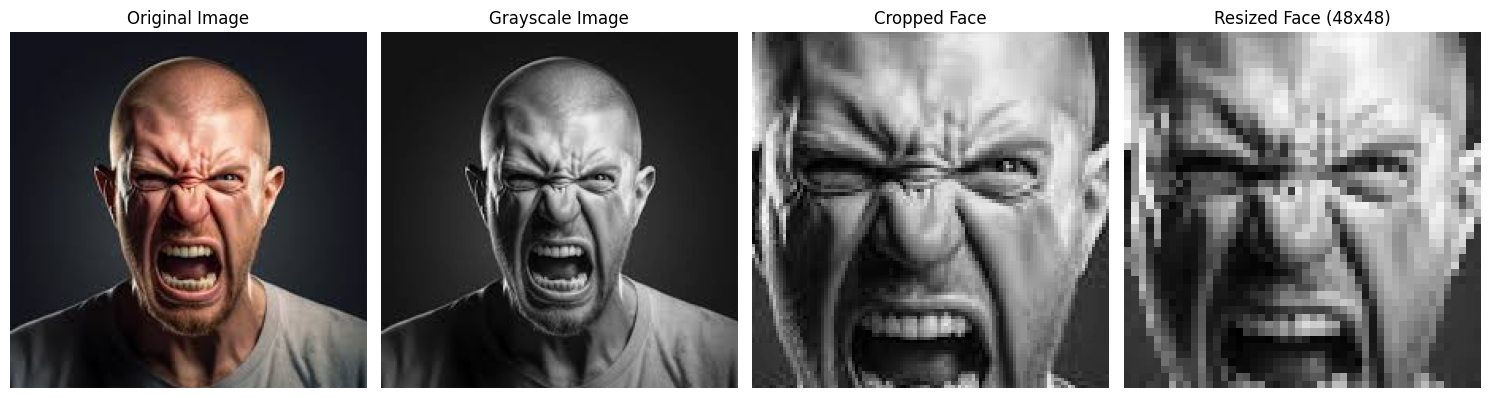

In [21]:
try:
    original, gray, cropped_face, resized_face, final_face = preprocess_face(image_path)

    # Plot the processing stages
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))
    axes[0].imshow(original)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    axes[1].imshow(gray, cmap="gray")
    axes[1].set_title("Grayscale Image")
    axes[1].axis("off")

    axes[2].imshow(cropped_face, cmap="gray")
    axes[2].set_title("Cropped Face")
    axes[2].axis("off")

    axes[3].imshow(resized_face, cmap="gray")
    axes[3].set_title("Resized Face (48x48)")
    axes[3].axis("off")

    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")

In [27]:
import tensorflow as tf

# Load the model
model_path = "my_model.h5"
model = tf.keras.models.load_model(model_path)

In [28]:
# Assuming `preprocessed_face` is the output of the preprocessing step
preprocessed_face = resized_face.reshape(1, 48, 48, 1)  # Add batch dimension

# Predict using the model
predictions = model.predict(preprocessed_face)

# Print the predictions
print("Model Predictions:", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step
Model Predictions: [[9.1054493e-01 4.1452822e-06 6.4053899e-07 9.7233737e-03 7.9726912e-02]]


In [29]:
import numpy as np

# Predictions array
class_names = ['Anger', 'Contentment', 'Joy', 'Neutral', 'Sadness']  # Your class names

# Find the index of the maximum probability
predicted_index = np.argmax(predictions)
predicted_class = class_names[predicted_index]

print("Predicted Class:", predicted_class)


Predicted Class: Anger
